## Cardiac Arrhythmia Database (UCI Datasets)
280 Features, 451 examples.

Inspect and load the dataset from https://archive.ics.uci.edu/dataset/5/arrhythmia

In [16]:
column_names = [
    "Age", "Sex", "Height", "Weight", "QRS_duration", "PR_interval", "QT_interval", "T_interval", "P_interval",
    "QRS_vector_angle", "T_vector_angle", "P_vector_angle", "QRST_vector_angle", "J_vector_angle", "Heart_rate"
]

# Channel DI
for i in range(16, 28):
    column_names.append(f"DI_{i}")

# Intrinsic deflections and Existence
for i in range(28, 40):
    column_names.append(f"DII_{i}")

# Channels DII to V6
for channel in range(40, 52):
    column_names.append(f"DIII_{channel}")

# Amplitude features for channel DI
for i in range(52, 64):
    column_names.append(f"AVR_{i}")

# QRSA and QRSTA for channel AVL
for i in range(64, 76):
    column_names.append(f"AVL_{i}")

# Amplitude features for channels AVF
for channel in range(76, 88):
    column_names.append(f"AVF_{channel}")

# Amplitude features for channels V1-V6
for vi in range(1,7):
  for channel in range(1, 13):
      column_names.append(f"V{vi}_{channel}")

# Amplitude features for channels DI
for channel in ['JJ', 'Q', 'R', 'S', 'R_', 'S_', 'P', 'T', 'QRSA', 'QRSTA']:
    column_names.append(f"DI_{channel}")

# Amplitude features for
for channel in ['DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'v5', 'V6']:
  for i in range(1, 11):
    column_names.append(f"{channel}_{i}")
# Add Class column
column_names.append("Class")

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
# Read the dataset into a DataFrame
df = pd.read_csv(url)
df.columns = column_names
df.shape

(451, 280)

## Preparation
- Replace ? with np.nan
- Drop NAs

In [18]:
# Replace '?' with NaN
df.replace({'?': np.nan}, inplace=True)
# Now you can drop NA values
df.dropna(inplace=True)

## Check correlation matrix

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Age,Sex,Height,Weight,QRS_duration,PR_interval,QT_interval,T_interval,P_interval,QRS_vector_angle,...,V6_2,V6_3,V6_4,V6_5,V6_6,V6_7,V6_8,V6_9,V6_10,Class
Age,1.000000,-0.094558,0.446532,0.466395,-0.011537,0.016955,0.167247,0.296540,0.052136,-0.065845,...,0.304218,-0.207885,0.193785,NaN,NaN,-0.117613,-0.417918,0.201660,-0.202185,-0.148547
Sex,-0.094558,1.000000,-0.462524,-0.227607,-0.090877,-0.250255,0.083270,-0.163377,-0.188862,0.042234,...,0.107385,-0.051890,0.158262,NaN,NaN,0.001247,0.049181,0.082087,0.093265,-0.134053
Height,0.446532,-0.462524,1.000000,0.632559,-0.299106,0.065297,-0.107825,-0.023788,0.133253,-0.050468,...,0.113702,0.041797,0.073846,NaN,NaN,-0.056240,-0.179542,0.046566,-0.151045,-0.129245
Weight,0.466395,-0.227607,0.632559,1.000000,-0.116921,0.120464,-0.084909,0.048099,0.139642,-0.063894,...,0.182463,-0.146103,0.064644,NaN,NaN,0.048149,-0.042679,-0.032418,-0.083935,-0.139280
QRS_duration,-0.011537,-0.090877,-0.299106,-0.116921,1.000000,0.142603,0.426338,0.478268,-0.012862,-0.153642,...,0.025912,-0.039001,-0.177015,NaN,NaN,-0.236279,-0.274496,0.258777,-0.074974,0.431893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6_7,-0.117613,0.001247,-0.056240,0.048149,-0.236279,0.077771,0.021282,0.035711,0.366087,0.169397,...,-0.173931,0.087481,-0.062561,NaN,NaN,1.000000,-0.059490,-0.051666,-0.015432,0.130929
V6_8,-0.417918,0.049181,-0.179542,-0.042679,-0.274496,0.008453,-0.184019,-0.427540,-0.130167,-0.008045,...,-0.020423,-0.133423,-0.160001,NaN,NaN,-0.059490,1.000000,-0.471497,0.508620,-0.062900
V6_9,0.201660,0.082087,0.046566,-0.032418,0.258777,-0.196655,0.407688,0.301513,-0.057476,0.391718,...,0.070592,0.475376,0.648355,NaN,NaN,-0.051666,-0.471497,1.000000,0.491085,0.096279
V6_10,-0.202185,0.093265,-0.151045,-0.083935,-0.074974,-0.181418,0.196717,-0.108325,-0.143796,0.379267,...,0.044917,0.309533,0.493709,NaN,NaN,-0.015432,0.508620,0.491085,1.000000,0.029137


<Axes: >

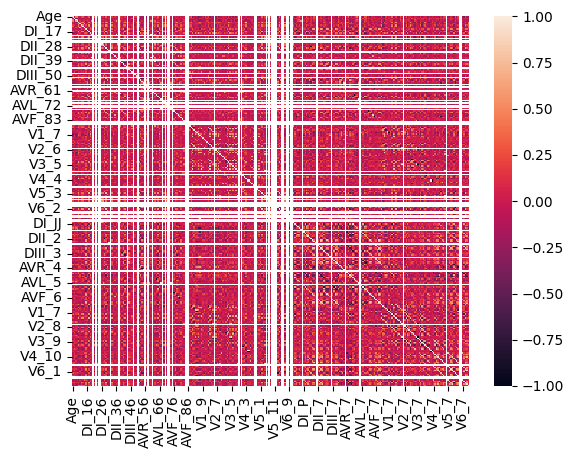

In [20]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()
# plot the heatmap
sns.heatmap(corr)

## Check class distribution

In the Arrhythmia Dataset, the 'Class' column represents different levels or categories of arrhythmias. Each level in the 'Class' column corresponds to a specific type of arrhythmia or heart rhythm abnormality.

The 'Class' column in the Arrhythmia Dataset contains integer values ranging from 1 to 16. Each integer value represents a different type of arrhythmia according to the following mapping:

- Class 1: Normal (no arrhythmia detected)
- Class 2-15: Various types of arrhythmias, each with a specific classification
- Class 16: Other anomalies or abnormalities not included in the specific arrhythmia types covered by classes 2-15

Therefore, there are a total of 16 levels in the 'Class' column, each representing a different type of arrhythmia or anomaly detected during the medical assessment or examination.

It's essential to understand the distribution and nature of these classes when working with the Arrhythmia Dataset for tasks such as classification or anomaly detection in cardiac health monitoring and diagnosis.

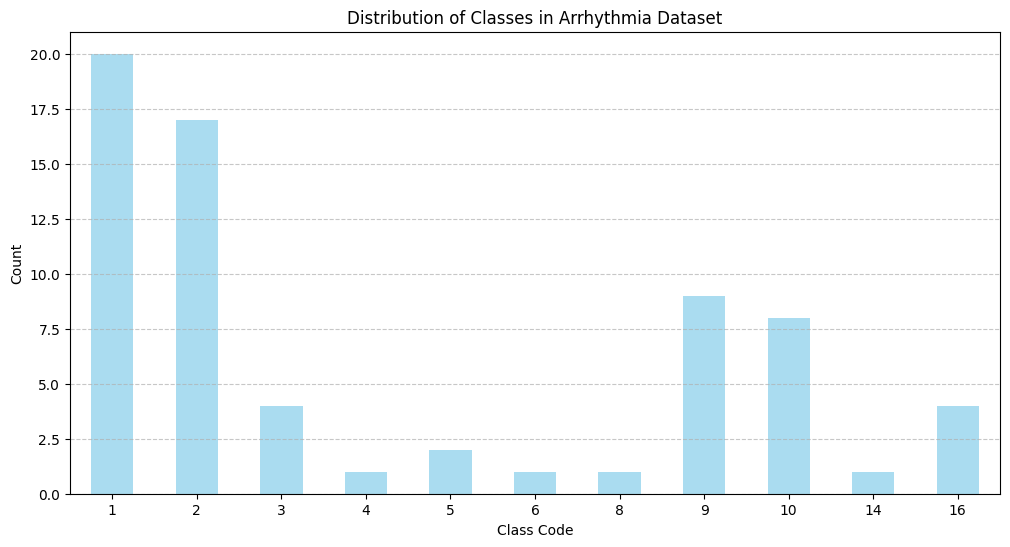

In [21]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts().sort_index()

# Plot the distribution of classes
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Classes in Arrhythmia Dataset')
plt.xlabel('Class Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Anomaly detection task:

- Data Preprocessing: handle missing values and standardize the features.
  - handle missing values by imputing the mean value for each feature.
  - standardize the features to have a mean of 0 and a standard deviation of 1.
- PCA: Apply PCA to reduce the dimensionality of the dataset.
  - Apply PCA to the standardized data, retaining enough components to explain 95% of the variance.
- Anomaly Detection: Use the PCA-transformed data to detect anomalies.
  - calculating the reconstruction error, which represents the difference between the original data and the reconstructed data using the reduced dimensionality.
  - Identify Anomalies based on the reconstruction error exceeding a certain threshold (e.g. the 95th percentile of the reconstruction errors).

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

In [23]:
# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Replace '?' with NaN (since '?' is not a valid numeric value)
X.replace({'?': None}, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [24]:
# Apply PCA
from sklearn.decomposition import PCA

# Retain enough components to explain 95% of the variance
pca = PCA(n_components=5)
scores = pca.fit_transform(X_scaled)
scores.shape

(68, 5)

In [25]:
# Calculate the reconstruction error
data_reconstructed = pca.inverse_transform(scores)
reconstruction_error = np.sum((X_scaled - data_reconstructed) ** 2, axis=1)

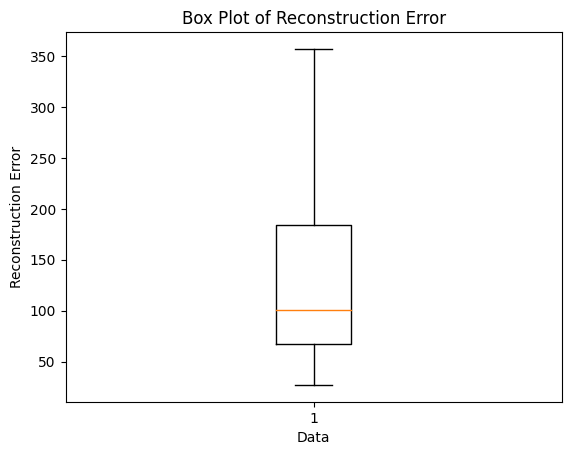

In [26]:
import matplotlib.pyplot as plt

# Create a box plot of the reconstruction error
plt.boxplot(reconstruction_error)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Reconstruction Error')
plt.title('Box Plot of Reconstruction Error')

# Show the plot
plt.show()

In [27]:
y

1      10
7       1
28      2
55      1
70     16
       ..
425     1
429    10
439     1
448     2
449     1
Name: Class, Length: 68, dtype: int64

In [28]:
# Threshold for detected outliers
threshold = 100

# Detect outliers based on reconstruction error
detected_outliers = (reconstruction_error < threshold).astype(int)
detected_outliers # 0s are outliers

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

In [29]:
# Convert values other than 1 to 0
y_binary = (y == 1).astype(int)

# Now `y_binary` contains 0 for non-outliers and 1 for actual outliers
print(y_binary)

1      0
7      1
28     0
55     1
70     0
      ..
425    1
429    0
439    1
448    0
449    1
Name: Class, Length: 68, dtype: int64


Confusion Matrix

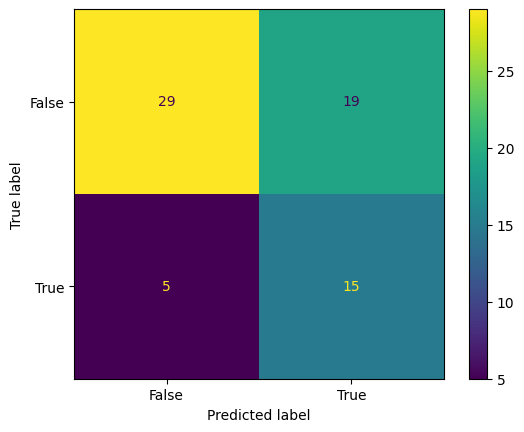

In [30]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_binary, detected_outliers)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()